### Redes Neurais em Problemas de Aproximação - Regressão de Energia

###### Usando dados do Lorenzetti Showers Framwork: https://doi.org/10.1016/j.cpc.2023.108671

Nesta tarefa, devemos projetar uma máquina de aprendizagem para estimar a energia de elétrons, utilizando variáveis descritivas do chuveiro como entradas.



*   1 - Avaliar os resultados para diferentes arquiteturas de Redes Neurais;

*   2 - Avaliar o desempenho dos modelos de acordo com diferentes parâmetros de treinamento (batch, algoritmos de otimização, critérios de parada, etc);

*   3 - Explorar as variáveis de entrada, e selecionar as melhores características para o projeto da máquina de aprendizagem;
*   4 - Avaliar o uso de pré-processamento (normalização, PCA).







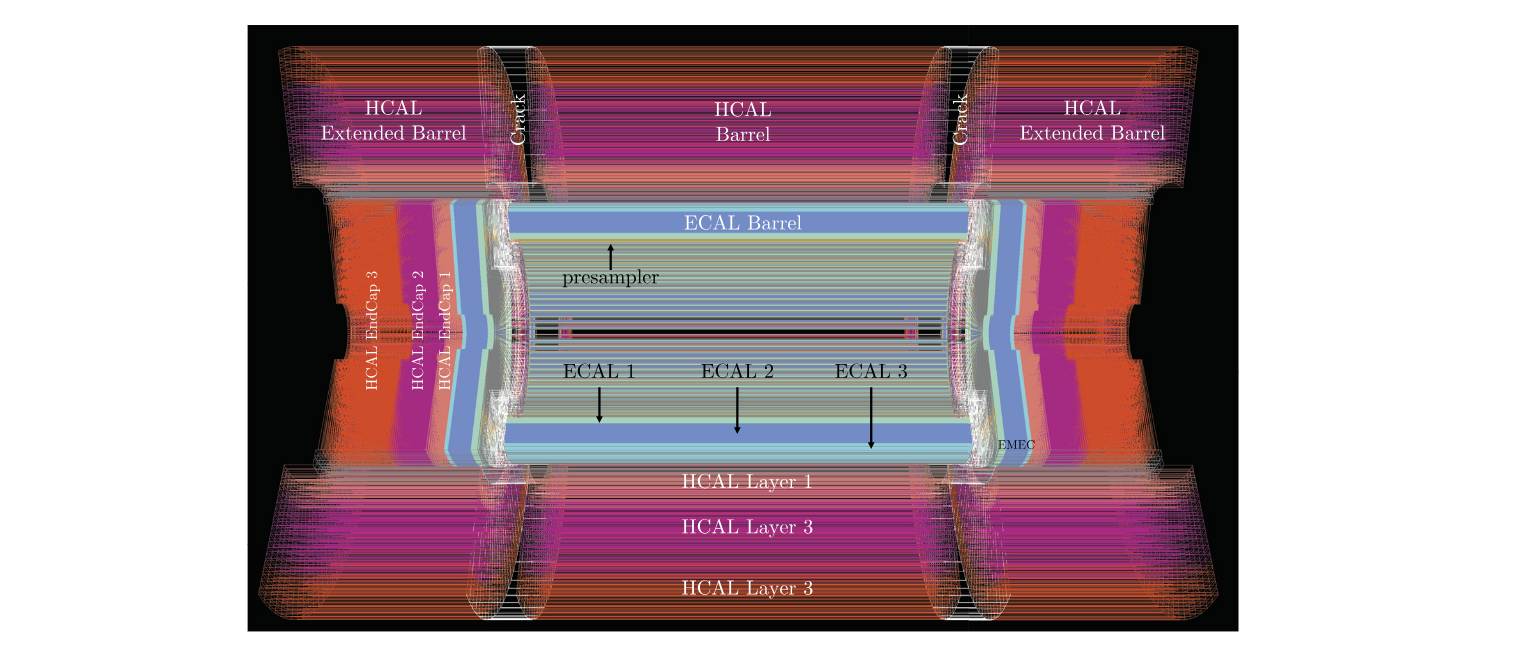

In [1]:
pip install uproot awkward

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [3]:
  file_zee = uproot.open('/content/root_files/zee.root')

In [4]:
print(file_zee['events'].keys())

['cluster_eta', 'cluster_phi', 'cluster_e', 'cluster_et', 'cluster_deta', 'cluster_dphi', 'cluster_e0', 'cluster_e1', 'cluster_e2', 'cluster_e3', 'cluster_ehad1', 'cluster_ehad2', 'cluster_ehad3', 'cluster_etot', 'cluster_e233', 'cluster_e237', 'cluster_e277', 'cluster_emaxs1', 'cluster_emaxs2', 'cluster_e2tsts1', 'cluster_reta', 'cluster_rphi', 'cluster_rhad', 'cluster_rhad1', 'cluster_eratio', 'cluster_f0', 'cluster_f1', 'cluster_f2', 'cluster_f3', 'cluster_weta2', 'rings', 'el_tight', 'el_medium', 'el_loose', 'el_vloose', 'cluster_secondR', 'cluster_lambdaCenter', 'cluster_secondLambda', 'cluster_fracMax', 'cluster_lateralMom', 'cluster_longitudinalMom', 'el_fwdTight', 'el_fwdMedium', 'el_fwdLoose']


In [5]:
#zee

e_zee       = file_zee['events']['cluster_e'].array(library="np").tolist()
et_zee      = file_zee['events']['cluster_et'].array(library="np").tolist()
eta_zee     = file_zee['events']['cluster_eta'].array(library="np").tolist()
phi_zee     = file_zee['events']['cluster_phi'].array(library="np").tolist()
reta_zee    = file_zee['events']['cluster_reta'].array(library="np").tolist()
rphi_zee    = file_zee['events']['cluster_rphi'].array(library="np").tolist()
weta2_zee   = file_zee['events']['cluster_weta2'].array(library="np").tolist()
ehad1_zee   = file_zee['events']['cluster_ehad1'].array(library="np").tolist()
ehad2_zee   = file_zee['events']['cluster_ehad2'].array(library="np").tolist()
ehad3_zee   = file_zee['events']['cluster_ehad3'].array(library="np").tolist()
erhad_zee   = file_zee['events']['cluster_rhad'].array(library="np").tolist()
erhad1_zee   = file_zee['events']['cluster_rhad1'].array(library="np").tolist()
eratio_zee   = file_zee['events']['cluster_eratio'].array(library="np").tolist()
e237_zee   = file_zee['events']['cluster_e237'].array(library="np").tolist()
e277_zee   = file_zee['events']['cluster_e277'].array(library="np").tolist()

In [6]:
features_zee = np.array([reta_zee, weta2_zee ,ehad1_zee, ehad2_zee, ehad3_zee, erhad_zee, erhad1_zee, eratio_zee ,e237_zee ,e277_zee])

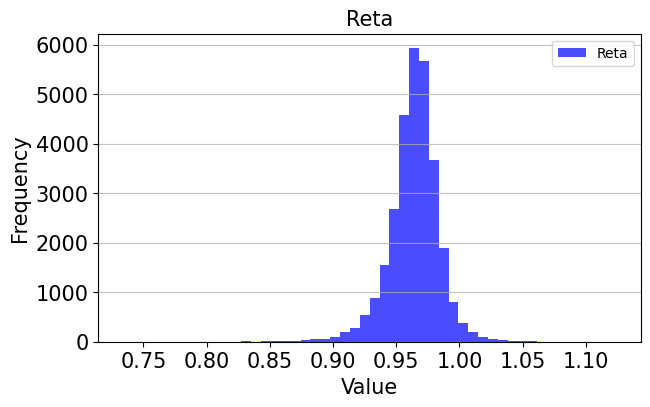

In [7]:
# Exploring input variables

plt.figure(figsize=[7,4])
plt.hist(x=reta_zee, bins=50, color='blue',alpha=0.7)
plt.legend(['Reta'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Reta',fontsize=15)
plt.show()

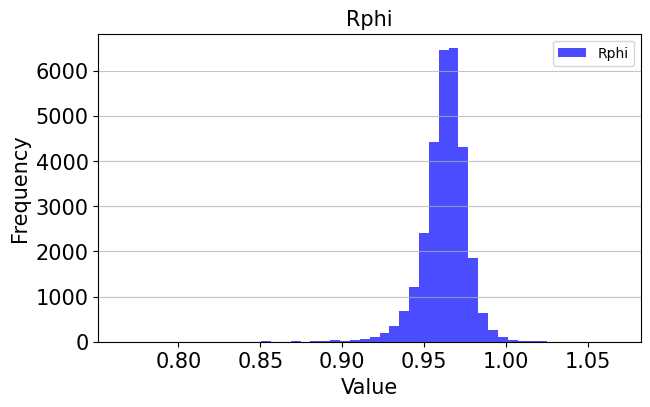

In [8]:
# Exploring input variables

plt.figure(figsize=[7,4])
plt.hist(x=rphi_zee, bins=50, color='blue',alpha=0.7)
plt.legend(['Rphi'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Rphi',fontsize=15)
plt.show()

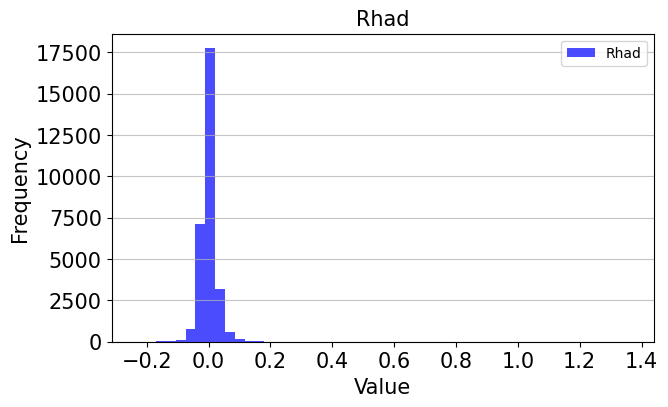

In [9]:
# Exploring input variables

plt.figure(figsize=[7,4])
plt.hist(x=erhad_zee, bins=50, color='blue',alpha=0.7)
plt.legend(['Rhad'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Rhad',fontsize=15)
plt.show()

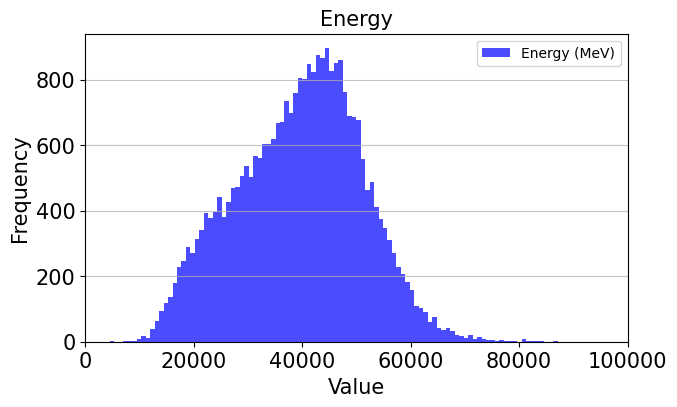

In [10]:
# Exploring input variables

plt.figure(figsize=[7,4])
plt.hist(x=e_zee, bins=100, color='blue',alpha=0.7)
plt.legend(['Energy (MeV)'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Energy',fontsize=15)
plt.xlim(0,100000)
plt.show()

In [11]:
targetData_zee = np.where(np.isfinite(e_zee), e_zee, 0)/1000
inputData_zee = np.transpose(np.where(np.isfinite(features_zee), features_zee, 0))

In [12]:
np.shape(inputData_zee)

(29764, 10)

In [13]:
# Pre-processing (min max)

setA = np.ones(14882).tolist()
setB = np.zeros(14882).tolist()
setA.extend(setB)
targetData_zeesets = setA

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(inputData_zee)
inputData_zee = scaled

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputData_zee, targetData_zee, test_size=0.5, stratify=targetData_zeesets, random_state=0)
x_train = np.array(x_train, dtype=np.float32)  # Ensure x_train is of type float32
x_test = np.array(x_test, dtype=np.float32)   # Ensure x_test is of type float32
y_train = np.array(y_train, dtype=np.float32)  # Ensure y_train is of type float32
y_test = np.array(y_test, dtype=np.float32)   # Ensure y_test is of type float32

In [15]:
## Defining Early Stop
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model_rg = Sequential()
model_rg.add(Dense(5, activation='relu', input_dim=10))
model_rg.add(Dense(1, activation='linear'))
model_rg.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_rg.summary()

hist = model_rg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=50, callbacks=[es])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1700.2153 - mse: 1700.2153 - val_loss: 1533.7476 - val_mse: 1533.7476
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1460.4592 - mse: 1460.4592 - val_loss: 1236.5128 - val_mse: 1236.5128
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1133.8645 - mse: 1133.8645 - val_loss: 891.6932 - val_mse: 891.6932
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 793.6850 - mse: 793.6850 - val_loss: 573.3706 - val_mse: 573.3706
Epoch 5/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 493.7089 - mse: 493.7089 - val_loss: 334.6729 - val_mse: 334.6729
Epoch 6/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 288.4164 - mse: 288.4164 - val_loss: 191.1711 - val_mse: 191.1711
Epoch 7/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 166.3090 - mse: 166.3090 - val_loss: 124.7820 - val_mse: 124.7820
Epoch 8/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 114.2911 - mse: 114.2911 - val_loss: 102

In [16]:
output = model_rg.predict(x_test)
outputNN = [x for xs in output for x in xs] #serializing

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


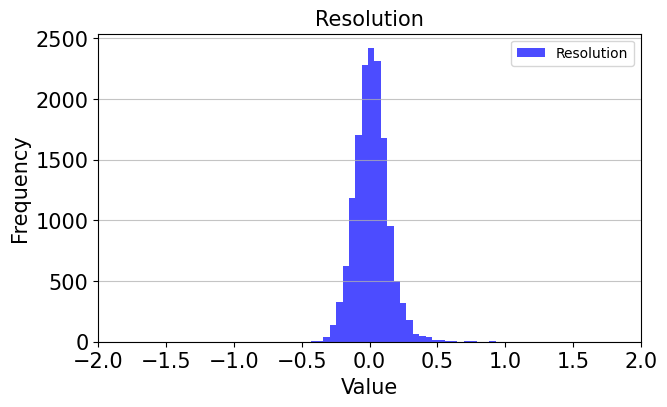

In [17]:
# Resolution plot
resolution = (outputNN - y_test )/ y_test

plt.figure(figsize=[7,4])
plt.hist(x=resolution, bins=100, color='blue',alpha=0.7)
plt.legend(['Resolution'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Resolution',fontsize=15)
plt.xlim(-2,2)
plt.show()

In [18]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


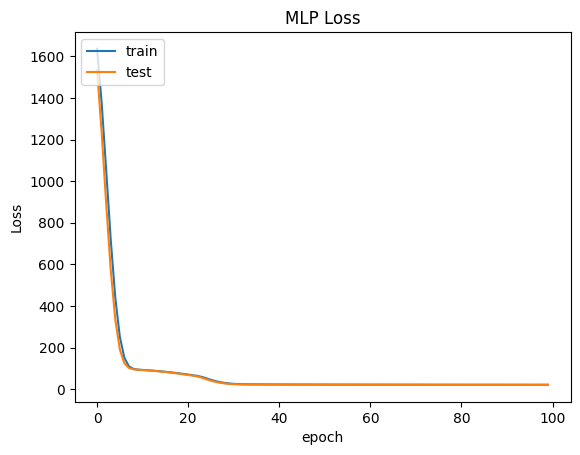

In [19]:
# summarize history for Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('MLP Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Convolutional Neural Network (CNN)

In [20]:
kernel_size=4
from tensorflow.keras import layers
import tensorflow as tf
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
input = layers.Input(shape=(10,), name = 'Input')
input_reshape = layers.Reshape((10,1), name='Reshape_layer')(input)
conv = layers.Conv1D(4, kernel_size = kernel_size, activation='relu', name = 'conv1d_layer_1')(input_reshape)
conv = layers.Conv1D(8, kernel_size = kernel_size, activation='relu', name = 'conv1d_layer_2')(conv)
conv = layers.Flatten(name='flatten')(conv)
dense = layers.Dense(16, activation='linear', name='dense_layer')(conv)
dense = layers.Dense(1,activation='linear', name='output_for_inference')(dense)
output = layers.Activation('linear', name='output_for_training')(dense)
model = tf.keras.Model(input, output, name = "model")
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [21]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Reshape_layer (Reshape)              │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_layer_1 (Conv1D)              │ (None, 7, 4)                │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_layer_2 (Conv1D)              │ (None, 4, 8)                │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_for_inference (Dense)         │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_for_training (Activation)     │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

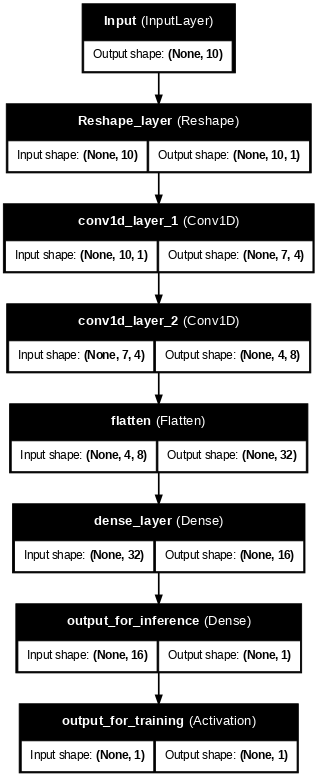

In [22]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=60,
)

In [27]:
hist_CNN = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=50,callbacks=[es])

Epoch 1/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19.4474 - mse: 19.4474 - val_loss: 19.4508 - val_mse: 19.4508
Epoch 2/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19.5355 - mse: 19.5355 - val_loss: 18.5385 - val_mse: 18.5385
Epoch 3/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 19.3876 - mse: 19.3876 - val_loss: 18.4362 - val_mse: 18.4362
Epoch 4/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 19.3684 - mse: 19.3684 - val_loss: 18.6153 - val_mse: 18.6153
Epoch 5/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 19.9959 - mse: 19.9959 - val_loss: 18.6912 - val_mse: 18.6912
Epoch 6/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19.4506 - mse: 19.4506 - val_loss: 18.4277 - val_mse: 18.4277
Epoch 7/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.9418 - mse: 18.9418 - val_loss: 19.8116 - val_mse: 19.8116
Epoch 8/200
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.6767 - mse: 19.6767 - val_loss: 18.4565 - val_mse: 18.4565
Epoch 9/200
298/

In [28]:
output = model.predict(x_test)
outputCNN = [x for xs in output for x in xs] #serializing

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


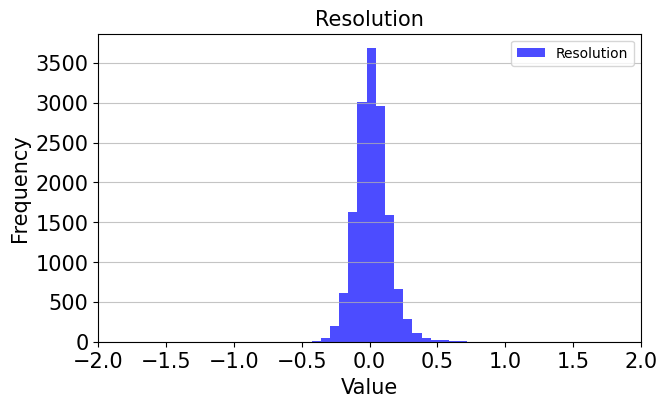

In [29]:
# Resolution plot
resolution = (outputCNN - y_test )/ y_test

plt.figure(figsize=[7,4])
plt.hist(x=resolution, bins=100, color='blue',alpha=0.7)
plt.legend(['Resolution'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Resolution',fontsize=15)
plt.xlim(-2,2)
plt.show()